In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1. Harris Corner Detection algorithm

Qs 1: [2 Marks] Implement the Harris algorithm using OpenCV. 

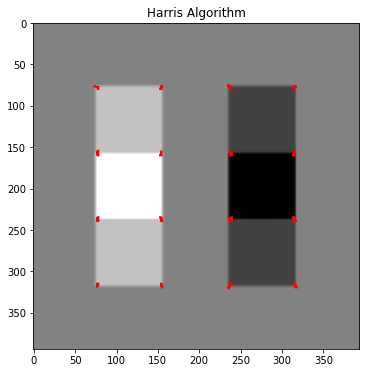

In [2]:
image_path = './A.jpg' 
image = cv2.imread(image_path)  # load the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # color space converting

dst = cv2.cornerHarris(src=gray_image, blockSize=2, ksize=3, k=0.04)  # Harris algorithm: Set the parameters for the Harris algorithm
dst = cv2.dilate(dst, None) # Dilate the result to mark the corners
image[dst > 0.001 * dst.max()] = [0, 0, 255]  # Threshold for an optimal value, optimize the candidate corners

plt.figure(figsize=(12, 6)) # Show the original image and the image with detected corners side by side
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # color space transfering from BGR to RGB
plt.title('Harris Algorithm')  # title of a plot
plt.show()  # display figure

# 2. Image Pyramid 

Qs 2: [2 Marks] Implement Image Pyramid using OpenCV.

In [3]:
image_path = './coco_2017_val/000000149770.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pyr_lv = 4  # levels of pyramid

(145, 200, 3)
(73, 100, 3)
(37, 50, 3)
(19, 25, 3)


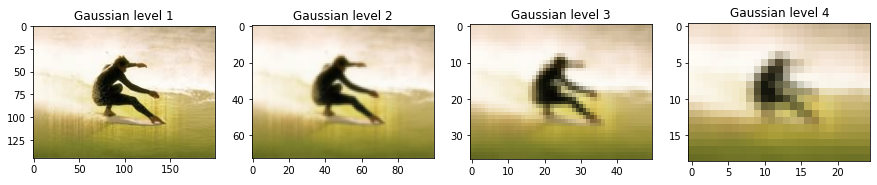

In [4]:
pyr_g = [image] # Create Gaussian pyramid

print(image.shape)
for i in range(pyr_lv - 1):
    image = cv2.pyrDown(image)  # Gaussian down sampling pryamid
    print(image.shape)
    pyr_g.append(image)  # save the down sampling images

# Display Gaussian pyramid
plt.figure(figsize=(15, 7))  # init a figure
for i in range(1, pyr_lv + 1):  # loop every laplasian level
    plt.subplot(1, pyr_lv, i)  # index of subplot
    plt.imshow(pyr_g[i - 1])  # image of subplot
    plt.title(f'Gaussian level {i}')  # title of subplot
plt.show()


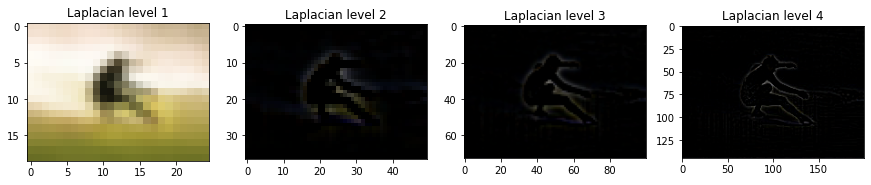

In [5]:
pyr_l = [pyr_g[-1]]  # init 

for i in range(pyr_lv - 1, 0, -1):  # reverse range from the last to the first
    up = cv2.pyrUp(pyr_g[i], dstsize=np.array(pyr_g[i - 1]).shape[0:2][::-1])  # apply size=[h, w] to Gaussian pyramid to up sampling it
    pyr_l.append(cv2.subtract(pyr_g[i - 1], up))  # subtract Gaussian sampling

# Display Laplacian pyramid
plt.figure(figsize=(15, 7))  # init a figure
for i in range(pyr_lv):  # loop every laplasian level
    plt.subplot(1, pyr_lv, i + 1)  # index of subplot
    plt.imshow(pyr_l[i])  # image of subplot
    plt.title(f'Laplacian level {i + 1}')  # title of subplot
plt.show()  # 

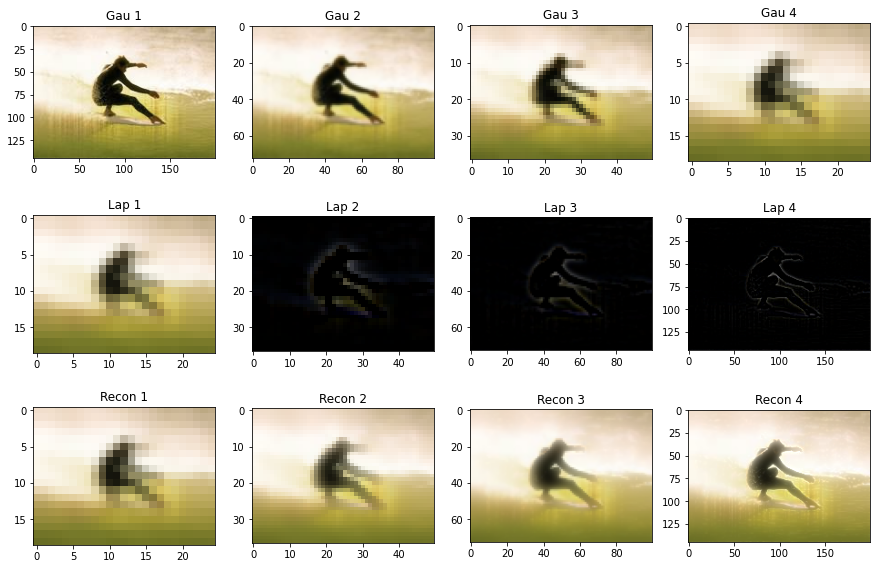

In [6]:
# Display reconstruction process for each level from Laplacian pyramid
plt.figure(figsize=(15, 10))  # init a figure
for i in range(pyr_lv):  # loop every laplasian level
    if i == 0:
        recon = pyr_l[0]  # init for the first step
    else:
        up = cv2.pyrUp(recon, dstsize=np.array(pyr_l[i].shape)[0:2][::-1])  # reconstruct image from pyr_laplasian
        recon = cv2.add(up, pyr_l[i])  # update reconstructed image
    
    # plot Gaussian pyramid
    plt.subplot(3, pyr_lv, 1 + i)  # index of subplot
    plt.imshow(pyr_g[i])  # image of subplot
    plt.title(f'Gau {i + 1}')  # title of subplot
    
    # plot Laplacian pyramid
    plt.subplot(3, pyr_lv, 5 + i)  # index of subplot
    plt.imshow(pyr_l[i])  # image of subplot
    plt.title(f'Lap {i + 1}')  # title of subplot
    
    # plot Reconstructed images
    plt.subplot(3, pyr_lv, 9 + i)  # index of subplot
    plt.imshow(recon)  # image of subplot
    plt.title(f'Recon {i + 1}')  # title of subplot
plt.show()

# 3. Image Segmentation with the Watershed Algorithm

[3 Marks] Implement Image Segmentation with Watershed Algorithm using OpenCV.

Text(0.5, 1.0, 'Image with Watershed Algorithm Applied')

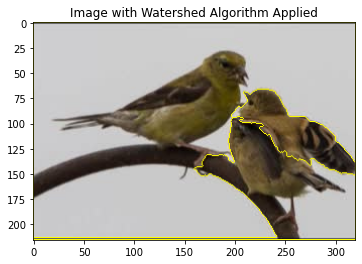

In [7]:
image = cv2.imread('./coco_2017_val/000000098261.jpg')

_, img = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Apply adaptive thresholding to get the binary image 

kernel = np.ones((3, 3), np.uint8)  # create an 3x3 array as kernel, filled it with int ones
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)  # Using morphological opening to remove small white regions

bg = cv2.dilate(opening, kernel, iterations=3)  # Find background area by dilating the opening result
trans = cv2.distanceTransform(opening, cv2.DIST_L2, 5)  # Find foreground area by applying distance transform 
_, fg = cv2.threshold(trans, 0.7 * trans.max(), 255, 0)  # applying thresholding to find foreground area
_, markers = cv2.connectedComponents(fg.astype(np.uint8))  # Label the markers (0 for background, 1 for foreground, and the rest for the unknown area)
cv2.watershed(image, markers)  # applying the Watershed Algorithm
image[markers == -1] = [0, 255, 255]  # mark the boundary with yellow color

plt.figure()  # Display the original image and the image with the Watershed Algorithm applied
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # change color space from BGR to RGB
plt.title('Image with Watershed Algorithm Applied')  # title of image

# 4. SIFT (Scale-Invariant Feature Transform) algorithm

Qs 4: [3 Marks] Implement SIFT algorithm using OpenCV.

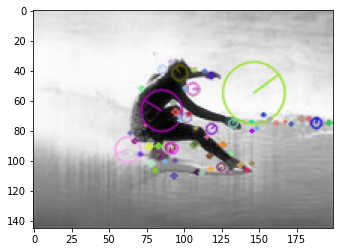

In [8]:
img = cv2.cvtColor(cv2.imread('./coco_2017_val/000000149770.jpg'), cv2.COLOR_BGR2GRAY)

pt, _ = cv2.SIFT_create().detectAndCompute(img, None)  # compute keypoints
img_with_pt = cv2.drawKeypoints(img, pt, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # Draw the keypoints on the image

plt.figure()
plt.imshow(img_with_pt)  # plot image with detections

# 5. YOLO on COCO images

Qs 5: [5 Marks] Implement object detection using YOLO on the COCO dataset. Provide the
results for any 5 images (for testing purposes) from the dataset. 

In [9]:
pip install ultralytics > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install ultralyticsplus > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


In [11]:
import glob
from ultralyticsplus import YOLO

model = YOLO("yolov8s.pt")  # YOLO v8 small network

In [12]:
model.overrides['conf'] = 0.5  # NMS confidence threshold
model.overrides['iou'] = 0.5  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

In [13]:
from ultralyticsplus import render_result
import os

files = glob.glob("./coco_2017_val/*")  # glob all images in the folder
result_files = []  # buffer to store images with predictions
for file in files:
    print(file)  # print filename
    results = model.predict(file, stream=True, verbose=False)
    for i, result in enumerate(results):  # results is an iterator, so I need to access the result like this
        render = render_result(model=model, image=file, result=result)  # draw results on the raw image
        filename, _ = os.path.splitext(file)  # got filename
        f = "%s_pred_%d.jpg" % (filename, len(result.boxes))  # create a new filename
        render.save(f)  # safe render results
        result_files.append(f)  # and save render results into buffer for later visualization


./coco_2017_val/000000149770.jpg


Ultralytics YOLOv8.0.43 🚀 Python-3.8.12 torch-1.12.1 CPU
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs


./coco_2017_val/000000098261.jpg
./coco_2017_val/000000375078.jpg
./coco_2017_val/000000290833.jpg
./coco_2017_val/000000002685.jpg
./coco_2017_val/000000106281.jpg


./coco_2017_val/000000149770_pred_1.jpg
./coco_2017_val/000000098261_pred_2.jpg
./coco_2017_val/000000375078_pred_4.jpg
./coco_2017_val/000000290833_pred_2.jpg
./coco_2017_val/000000002685_pred_9.jpg
./coco_2017_val/000000106281_pred_2.jpg


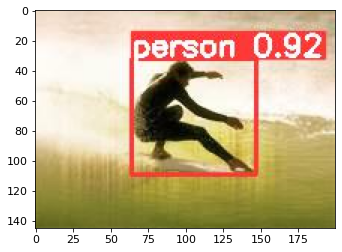

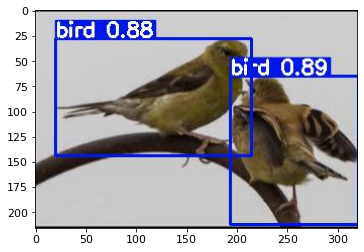

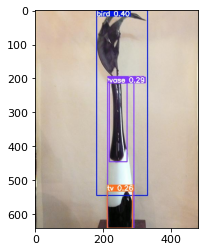

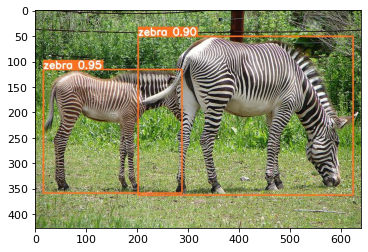

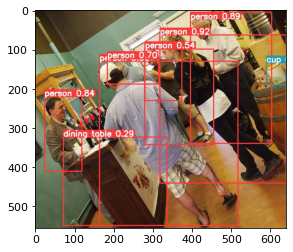

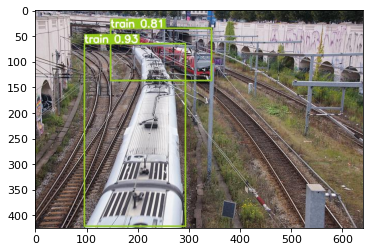

In [14]:
for file in result_files:
    print(file)
    img = cv2.imread(file)  # load images with predictions
    cv = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # color space transformation

    plt.figure()
    plt.imshow(cv)  # display it one by one